In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

penguins = sns.load_dataset('penguins')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].dropna().to_numpy()
y = penguins['species'].dropna().to_numpy()

In [4]:
X_scaled = StandardScaler().fit_transform(X)

In [5]:
pca = PCA()
pca.fit(X_scaled)

print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")

PCA Explained Variance Ratio: [0.68843878 0.19312919 0.09130898 0.02712305]


In [6]:
per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var}")

per_var = [68.84 19.31  9.13  2.71]


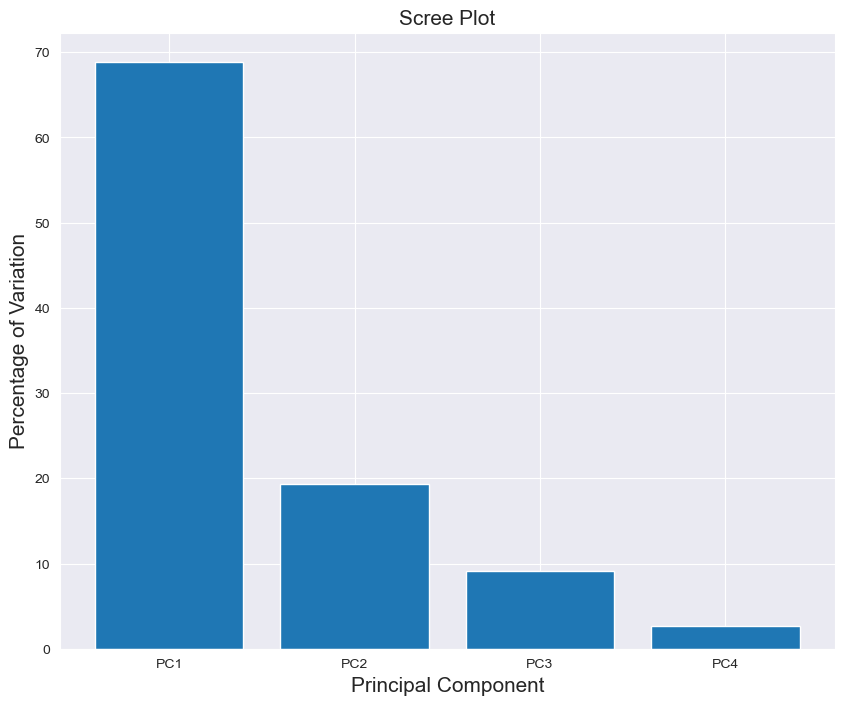

In [7]:
labels = [f"PC{i}" for i in range(1,5)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [8]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
pd.DataFrame(data = pca.components_, columns = labels, index = features)

,PC1,PC2,PC3,PC4
bill_length_mm,0.455250,-0.400335,0.576013,0.548350
bill_depth_mm,0.597031,0.797767,0.002282,0.084363
flipper_length_mm,0.644301,-0.418427,-0.232084,-0.596600
body_mass_g,0.145523,-0.167986,-0.783799,0.579882


In [15]:
pca_data = pca.transform(X_scaled)
pca_df = pd.DataFrame(pca_data, columns = labels)
print(pca_df)

projected_df = pd.concat([pca_df, penguins.species], axis = 1)
projected_df

          PC1       PC2       PC3       PC4
0   -1.843445  0.047702 -0.232794  0.523903
1   -1.306762 -0.428348 -0.029562  0.402426
2   -1.369181 -0.154476  0.198672 -0.528007
3   -1.878827 -0.002048 -0.618596 -0.478378
4   -1.911748  0.829210 -0.686584 -0.207428
..        ...       ...       ...       ...
337  2.006436 -0.958909  0.364630  0.174829
338  1.840886 -0.767714  0.229386  0.002905
339  2.760742  0.288886 -0.428439  0.240717
340  1.722364 -0.704269 -0.276979  0.338516
341  2.028902  0.357620 -0.162893  0.442237

[342 rows x 4 columns]


,PC1,PC2,PC3,PC4,species
0,-1.843445,0.047702,-0.232794,0.523903,Adelie
1,-1.306762,-0.428348,-0.029562,0.402426,Adelie
2,-1.369181,-0.154476,0.198672,-0.528007,Adelie
3,-1.878827,-0.002048,-0.618596,-0.478378,Adelie
4,-1.911748,0.829210,-0.686584,-0.207428,Adelie
...,...,...,...,...,...
339,2.760742,0.288886,-0.428439,0.240717,Gentoo
340,1.722364,-0.704269,-0.276979,0.338516,Gentoo
341,2.028902,0.357620,-0.162893,0.442237,Gentoo
342,NaN,NaN,NaN,NaN,Gentoo


In [16]:
def colors(y):
    if y == "Adelie":
        return "red"
    elif y == "Chinstrap":
        return "magenta"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]
projected_df['color'] = c

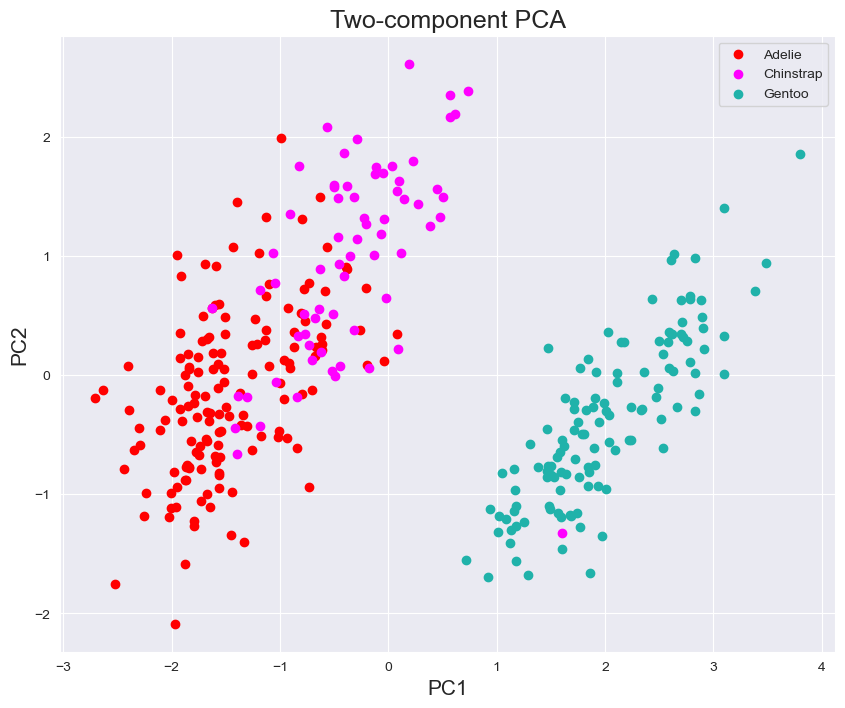

In [17]:
targets = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['species'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()